
## Questão 1

A detecção de objetos é mais complexa pois, enquanto a classificação exige apenas identificar qual objeto está presente em uma imagem, a detecção precisa determinar simultaneamente quais objetos estão presentes e onde eles estão localizados, geralmente atribuindo caixas retangulares (bounding boxes). Esse duplo desafio é ainda mais complicado pela necessidade de lidar com múltiplos objetos de diferentes tamanhos, formas e posições dentro da mesma imagem.

---

## Questão 2

Embora tanto a segmentação semântica quanto a segmentação por instâncias classifiquem os pixels da imagem, elas diferem na forma como lidam com múltiplos objetos da mesma classe. A segmentação semântica atribui cada pixel a uma categoria sem distinguir entre instâncias individuais, ou seja, todos os carros ou todas as pessoas são rotulados uniformemente. Já a segmentação por instâncias não apenas classifica os pixels, mas também os separa em instâncias distintas de objeto, como rotular um carro como "carro 1", outro como "carro 2" e assim por diante, combinando efetivamente as tarefas de detecção de objetos com segmentação em nível de pixel.

---

## Questão 3

Uma bounding box é um retângulo que delimita visualmente um objeto dentro de uma imagem, indicando onde ele começa e termina. Na prática, é um rótulo espacial que além de dizer o que está na cena (por exemplo, um carro), ela descreve onde esse objeto está. Existem duas convenções muito usadas para expressar essa caixa. A primeira usa o centro do retângulo e suas dimensões: $(x, y, w, h)$, em que $x$ e $y$ são as coordenadas do centro da caixa, $w$ é a largura e $h$ é a altura. A segunda descreve diretamente os cantos opostos: $(x_{min}, y_{min}, x_{max}, y_{max})$, correspondendo, respectivamente, aos pontos superior-esquerdo e inferior-direito da caixa. 
Na maioria dos modelos, as boxes são retângulos alinhados aos eixos (sem rotação) por simplicidade e velocidade. Essas caixas são fundamentais tanto no treinamento (para calcular perdas como IoU e guiar a rede a prever posições corretas) quanto na avaliação, servindo de base para métricas que quantificam o quão bem as predições se sobrepõem aos objetos reais.

---

## Questão 4

O modelo original R-CNN (Regions with CNN features) é considerado um detector em duas etapas porque combina um processo clássico de geração de regiões de interesse com o poder de aprendizado das redes neurais convolucionais. Na primeira etapa, chamada de proposta de regiões (region proposal), um algoritmo tradicional de visão computacional, como o Selective Search, percorre a imagem em busca de áreas que possuam maior chance de conter objetos. Esse processo gera cerca de duas mil regiões candidatas, que funcionam como bounding boxes preliminares. Na segunda etapa, chamada de classificação e refinamento, cada região proposta é redimensionada para um formato fixo e passada por uma CNN, que extrai um vetor de características representando seu conteúdo. Em seguida, essas características são classificadas por Máquinas de Vetores de Suporte (SVMs), que determinam a qual classe o objeto pertence, enquanto um modelo de regressão linear é utilizado para ajustar as coordenadas da bounding box, tornando sua posição e dimensões mais precisas em relação ao objeto real.

---

## Questão 5


* Caixa 1: (40, 40, 20, 30)
* Caixa 2: (45, 45, 10, 10)


**Converter para coordenadas dos cantos**

* $x_{\min} = x - \dfrac{w}{2}$
* $y_{\min} = y - \dfrac{h}{2}$
* $x_{\max} = x + \dfrac{w}{2}$
* $y_{\max} = y + \dfrac{h}{2}$

**Caixa 1 (40,40,20,30):**

* $x_{1\min} = 40 - \dfrac{20}{2} = 40 - 10 = 30$
* $y_{1\min} = 40 - \dfrac{30}{2} = 40 - 15 = 25$
* $x_{1\max} = 40 + 10 = 50$
* $y_{1\max} = 40 + 15 = 55$

Caixa 1 em cantos: $(30,\,25,\,50,\,55)$

**Caixa 2 (45,45,10,10):**

* $x_{2\min} = 45 - \dfrac{10}{2} = 45 - 5 = 40$
* $y_{2\min} = 45 - 5 = 40$
* $x_{2\max} = 45 + 5 = 50$
* $y_{2\max} = 45 + 5 = 50$
Caixa 2 em cantos: $(40,\,40,\,50,\,50)$

**Áreas individuais**

* Caixa 1: $A_1 = 20 \times 30 = 600$
* Caixa 2: $A_2 = 10 \times 10 = 100$

**Área de interseção**

Coord. da interseção (retângulo sobreposto):

* $x_{\text{inter\_min}} = \max(x_{1\min},x_{2\min}) = \max(30,40) = 40$
* $y_{\text{inter\_min}} = \max(y_{1\min},y_{2\min}) = \max(25,40) = 40$
* $x_{\text{inter\_max}} = \min(x_{1\max},x_{2\max}) = \min(50,50) = 50$
* $y_{\text{inter\_max}} = \min(y_{1\max},y_{2\max}) = \min(55,50) = 50$

Largura da interseção: $w_{\text{inter}} = x_{\text{inter\_max}} - x_{\text{inter\_min}} = 50 - 40 = 10$
Altura da interseção: $h_{\text{inter}} = y_{\text{inter\_max}} - y_{\text{inter\_min}} = 50 - 40 = 10$

Área de interseção:
$A_{\text{inter}} = w_{\text{inter}} \times h_{\text{inter}} = 10 \times 10 = 100$

(Se alguma diferença resultasse em largura ou altura ≤ 0, a interseção seria 0 — aqui há sobreposição positiva.)

**Área da união**

Fórmula: $A_{\text{união}} = A_1 + A_2 - A_{\text{inter}}$

Substituindo:
$A_{\text{união}} = 600 + 100 - 100 = 600$


**Calcular o IoU**

Definição: $\displaystyle \text{IoU} = \frac{A_{\text{inter}}}{A_{\text{união}}}$

Substituindo:
$\displaystyle \text{IoU} = \frac{100}{600} = \frac{1}{6} $

$\displaystyle \text{IoU} = 0.167

---

## Questão 6
Os métodos tradicionais de visão computacional, como SIFT, dependem do processo conhecido como *feature engineering*, no qual especialistas humanos projetam algoritmos específicos para extrair características relevantes de uma imagem, como bordas, cantos ou histogramas de cor. Essas características, por sua vez, são utilizadas como entrada para um classificador separado. Já as Redes Neurais Convolucionais (CNNs) eliminam essa necessidade de intervenção manual, pois são capazes de aprender automaticamente as características durante o processo de treinamento. As camadas convolucionais atuam como extratores de características ajustáveis: nas camadas iniciais, a rede aprende a identificar padrões simples, como bordas, cores e gradientes; nas camadas mais profundas, combina esses padrões para capturar estruturas mais complexas, como partes de objetos, e, finalmente, nas últimas camadas, utiliza essas representações hierárquicas para executar a tarefa de classificação ou detecção. Esse processo de aprendizado de ponta a ponta, que parte diretamente dos pixels da imagem, torna as CNNs muito mais poderosas e escaláveis do que a abordagem tradicional baseada em engenharia manual de características.

---

## Questão 7

Na arquitetura original da R-CNN, depois que a Rede Neural Convolucional (CNN) extrai um vetor de características para cada região proposta, a tarefa de classificação é realizada por um conjunto de Máquinas de Vetores de Suporte (SVMs) lineares. Para um problema com C classes de objetos, são treinadas C SVMs binárias, em que cada uma é responsável por decidir se a região pertence ou não a uma determinada classe, ou seja, funciona no esquema "classe X vs. não-classe X". O vetor de características extraído pela CNN é então passado para todas as SVMs, e a classe associada ao classificador que apresentar o maior score é atribuída àquela região.

---

## Questão 8

A camada Softmax, responsável pela classificação, que gera uma distribuição de probabilidades sobre C + 1 classes — onde C corresponde às classes de objetos e o “+1” representa a classe de fundo. O uso do softmax é adequado porque ele converte os scores em probabilidades que somam 1, permitindo uma escolha clara da classe mais provável. Já a segunda saída é a camada Linear, destinada à regressão de bounding boxes. Ela gera quatro valores contínuos (dx, dy, dw, dh) para cada classe, que servem para ajustar a posição e o tamanho da caixa delimitadora proposta, tornando-a mais precisa. Nesse caso, não se utiliza uma função de ativação não linear, pois se trata de uma tarefa de regressão que requer valores numéricos contínuos. Assim, o Fast R-CNN consegue realizar classificação e refinamento de caixas de forma simultânea e eficiente.

---

## Questão 9

A YOLO divide a imagem em uma grade de $S \times S$ células. Cada célula prevê $B$ bounding boxes (cada uma com $x, y, w, h$ e confiança) e probabilidades de classe.

Para $S=3$ (grade $3\times3$) e $B=4$ caixas por célula.

- **Máximo teórico de boxes preditas:** $S \times S \times B = 3 \times 3 \times 4 = 36$ (todas as caixas geradas pela rede).
- **Máximo prático de objetos únicos:** $S \times S = 9$ (uma detecção por célula, regra do YOLO original).

Após a predição, aplica-se limiar de confiança, multiplica-se pela probabilidade de classe e utiliza-se Non-Max Suppression (NMS) para remover caixas redundantes. Assim, o número final de detecções reais costuma ser bem menor que 36.

---

## Questão 10

O tamanho do vetor de saída da YOLO é dado por:

$$
\text{Saída} = S \times S \times (B \times 5 + C)
$$

Cada um dos B boxes prevê 5 valores (x, y, w, h, confiança), além das C probabilidades de classes por célula.

Saída = 6 * 6 * (4*5 + 15) = 36 * 35 = 1260 neurônios

---

## Questão 11 a)

A saída por célula é dada no formato:

$$
[\rho_1, x_1, y_1, h_1, w_1,\; \rho_2, x_2, y_2, h_2, w_2,\; c_{\text{carro}}, c_{\text{moto}}, c_{\text{ônibus}}].
$$

Adotando o limiar de *objectness* $\rho_{\text{lim}} = 0{,}5$, considera-se que uma das caixas propostas pela célula contém um objeto somente se a respectiva $\rho$ exceder o limiar.

#### Resultados por célula

* **Bloco A (superior esquerdo):**
  $\rho_1 = 0{,}0,\; \rho_2 = 0{,}0$.
  Nenhuma caixa excede 0,5 ⟹ **sem detecção**.

* **Bloco B (superior direito):**
  $\rho_1 = 0{,}0,\; \rho_2 = 0{,}8>0{,}5$.
  Há detecção associada à segunda caixa ($\rho_2$).
  Probabilidades de classe: $(c_{\text{carro}}=0{,}8,\; c_{\text{moto}}=0{,}1,\; c_{\text{ônibus}}=0{,}1)$.
  Classe mais provável: **carro**.

* **Bloco C (inferior esquerdo):**
  $\rho_1 = 0{,}0,\; \rho_2 = 0{,}0$.
  Nenhuma detecção.

* **Bloco D (inferior direito):**
  $\rho_1 = 0{,}9>0{,}5,\; \rho_2 = 0{,}0$.
  Há detecção associada à primeira caixa ($\rho_1$).
  Probabilidades de classe: $(0{,}1,\;0{,}7,\;0{,}2)$.
  Classe mais provável: **moto**.

---

**Cálculo da confiança final por classe**

Em muitas implementações de YOLO a **confiança final** de cada classe é calculada por:

$$
\text{confiança\_classe} = \rho \times P(\text{classe}).
$$

### Bloco B, caixa 2 (carro)

$$
\text{confiança}_{\text{carro}} = 0{,}8 \times 0{,}8 = 0{,}64.
$$

As outras classes teriam:

$$
0{,}8\times0{,}1 = 0{,}08 \quad \text{(moto e ônibus)}.
$$

A confiança final para **carro = 0,64**, acima do limiar 0,5.

---

### Bloco D, caixa 1 (moto)

$$
\text{confiança}_{\text{moto}} = 0{,}9 \times 0{,}7 = 0{,}63.
$$

As outras classes teriam:

$$
0{,}9\times0{,}1 = 0{,}09, \quad 0{,}9\times0{,}2 = 0{,}18.
$$

A confiança final para **moto = 0,63**, também acima do limiar 0,5.

---




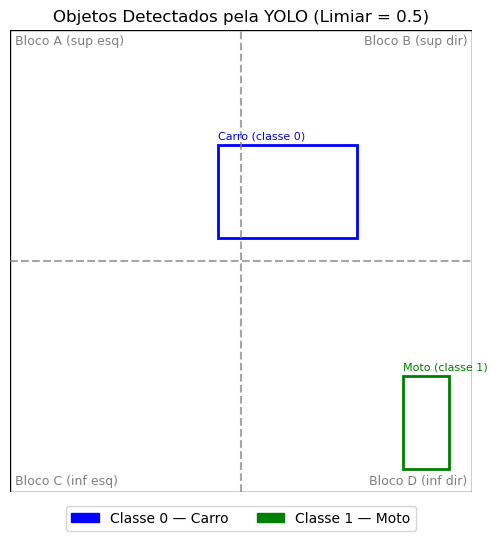

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Cálculos das Coordenadas ---

# Imagem e Grade
img_size = 512
cell_size = 256

# Objeto 1: Carro no Bloco B (sup dir)
# Coordenadas relativas: x=0.2, y=0.7, w=0.3, h=0.2
# Bloco B tem origem em (col=1, row=0)
center_x1 = (1 + 0.2) * cell_size  # 307.2
center_y1 = (0 + 0.7) * cell_size  # 179.2
width1 = 0.3 * img_size           # 153.6
height1 = 0.2 * img_size          # 102.4
# Canto superior esquerdo da caixa
x1_corner = center_x1 - (width1 / 2) # 230.4
y1_corner = center_y1 - (height1 / 2) # 128.0

# Objeto 2: Moto no Bloco D (inf dir)
# Coordenadas relativas: x=0.8, y=0.7, w=0.1, h=0.2
# Bloco D tem origem em (col=1, row=1)
center_x2 = (1 + 0.8) * cell_size  # 460.8
center_y2 = (1 + 0.7) * cell_size  # 435.2
width2 = 0.1 * img_size           # 51.2
height2 = 0.2 * img_size          # 102.4
# Canto superior esquerdo da caixa
x2_corner = center_x2 - (width2 / 2) # 435.2
y2_corner = center_y2 - (height2 / 2) # 384.0


# --- Geração do Gráfico ---

# Criar figura 512x512
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 512)
ax.set_ylim(0, 512)
ax.set_aspect('equal')
# Inverter o eixo Y para que a origem (0,0) fique no canto superior esquerdo
ax.invert_yaxis()


# Desenhar borda da imagem e grade 2x2
ax.add_patch(patches.Rectangle((0,0), 512, 512, linewidth=1, edgecolor='black', facecolor='none'))
ax.axhline(256, linestyle='--', color='gray', alpha=0.7)
ax.axvline(256, linestyle='--', color='gray', alpha=0.7)

# Rótulos dos quadrantes
ax.text(5, 5, "Bloco A (sup esq)", fontsize=9, ha='left', va='top', color='gray')
ax.text(507, 5, "Bloco B (sup dir)", fontsize=9, ha='right', va='top', color='gray')
ax.text(5, 507, "Bloco C (inf esq)", fontsize=9, ha='left', va='bottom', color='gray')
ax.text(507, 507, "Bloco D (inf dir)", fontsize=9, ha='right', va='bottom', color='gray')

# Desenhar Bounding Box 1: Carro (azul)
rect_carro = patches.Rectangle((x1_corner, y1_corner), width1, height1, linewidth=2, edgecolor='blue', facecolor='none')
ax.add_patch(rect_carro)
ax.text(x1_corner, y1_corner - 5, "Carro (classe 0)", color='blue', fontsize=8, ha='left', va='bottom')

# Desenhar Bounding Box 2: Moto (verde)
rect_moto = patches.Rectangle((x2_corner, y2_corner), width2, height2, linewidth=2, edgecolor='green', facecolor='none')
ax.add_patch(rect_moto)
ax.text(x2_corner, y2_corner - 5, "Moto (classe 1)", color='green', fontsize=8, ha='left', va='bottom')


# Legenda
legend_patches = [
    patches.Patch(color='blue', label='Classe 0 — Carro'),
    patches.Patch(color='green', label='Classe 1 — Moto')
]
ax.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Título e eixos
ax.set_title("Objetos Detectados pela YOLO (Limiar = 0.5)")
ax.axis('off')

plt.show()

# Questão 11 b)

---

### Blocos da Grade

**Bloco A (superior esquerdo)**
Não há nenhum objeto aqui. Portanto, as confianças (rho1 e rho2) devem ser 0. Os outros valores são irrelevantes, mas tipicamente zerados.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**Bloco B (superior direito)**

Este bloco contém o centro de um Carro (classe 0). A rede usou sua segunda caixa delimitadora (bounding box) para detectá-lo. Assim a confiança da caixa responsável (rho2) deve ser 1 (indicando 100% de certeza de que há um objeto) enquento a outra caixa (rho1) deve ser 0.

As classes devem ser um vetor one-hot para "Carro" (classe 0): [1, 0, 0].

[0, 0, 0, 0, 0, 1, 0.2, 0.7, 0.2, 0.3, 1, 0, 0]

**Bloco C (inferior esquerdo)**

Mesmo raciocínio do Bloco A

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**Bloco D (inferior direito)**

Este bloco contém o centro de uma Moto (classe 1). A rede usou sua primeira caixa delimitadora para a detecção. Assim confiança da caixa responsável (rho1) deve ser 1 equanto da outra caixa (rho2) deve ser 0.

As classes devem ser um vetor one-hot para "Moto" (classe 1): [0, 1, 0].

[1, 0.8, 0.7, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 1, 0]

---
